# <span style='color:OrangeRed'>V4 REGELALGORITHMEN FÜR DIE DIGITALE REGELUNG - TEIL 2</span>

<p>Gegeben ist ein System mit der Verstärkung 2 und zwei Zeitkonstanten: 1 und 2s. Entwerfen Sie einen Deadbeat-Regler für das System. Verwenden Sie eine Abtastzeit von 5s.</p>

<p>Zunächst müssen wir die Übertragungsfunktion des Systems definieren.</p>

In [40]:
clear all
pkg load control

% Set the Octsim Engine to run the simulation
addpath('../Octsim');


tau1 = 1
tau2 = 2
K = 2

num = K
den = conv([tau1 1],[tau2 1])

Gs = tf(num,den)

tau1 =  1
tau2 =  2
K =  2
num =  2
den =

   2   3   1


Transfer function 'Gs' from input 'u1' to output ...

             2       
 y1:  ---------------
      2 s^2 + 3 s + 1

Continuous-time model.


<p>Dann müssen wir das System diskretisieren</p>

In [45]:
Ts = 5
Gz = c2d(Gs,Ts,'zoh')

Ts =  5

Transfer function 'Gz' from input 'u1' to output ...

           1.685 z + 0.1383      
 y1:  ---------------------------
      z^2 - 0.08882 z + 0.0005531

Sampling time: 5 s
Discrete-time model.


<p>Jetzt können wir den Controller entwerfen.</p>

In [46]:
numGz = cell2mat(Gz.num)
denGz = cell2mat(Gz.den)

numd = denGz
dend = conv(numGz,[1 0 -1])

Grz = tf(numd,dend,Ts)

numGz =

   1.68514   0.13832

denGz =

   1.00000000  -0.08882295   0.00055308

numd =

   1.00000000  -0.08882295   0.00055308

dend =

   1.68514   0.13832  -1.68514  -0.13832


Transfer function 'Grz' from input 'u1' to output ...

             z^2 - 0.08882 z + 0.0005531       
 y1:  -----------------------------------------
      1.685 z^3 + 0.1383 z^2 - 1.685 z - 0.1383

Sampling time: 5 s
Discrete-time model.


<p>Wir können die Ergebnisse in der Simulation überprüfen.</p>

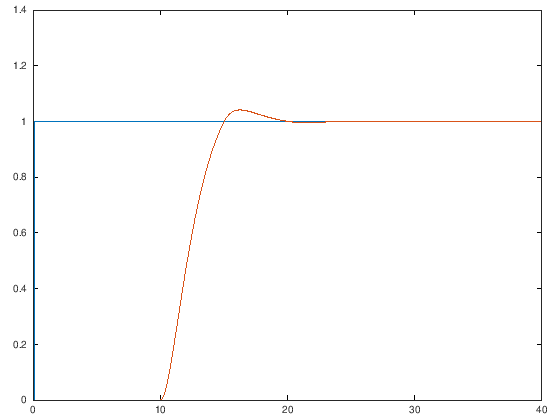

In [43]:
% Number of data flows in the schematic
nflows = 4;
tini = 0;
tfinal = 40;
dt = 0.01;

% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);

% List of components
c1{1} = StepSource(1,0,1,0.1);
c1{2} = Sum(1,2,3,1,-1);
c1{3} = DTTransferFunction(3,4,numd,dend,Ts);
c1{4} = TransferFunction(4,2,num,den);


sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([1 2 3]);
plot(out1(1,:),out1(2,:),out1(1,:),out1(3,:));
ylim([-0.25 1.25]);

<p>Wir können die Übertragungsfunktion des geschlossenen Regelkreises auch analytisch überprüfen.</p>

In [47]:
Gl = Grz*Gz;
Gcl = Gl/(1+Gl);
Gcl = minreal(Gcl)


Transfer function 'Gcl' from input 'u1' to output ...

       1 
 y1:  ---
      z^2

Sampling time: 5 s
Discrete-time model.
